In [10]:
from taylorSeries import *
from matplotlib.pyplot import *
import timeit
%matplotlib inline

In [24]:
def paso(a, eps= 1e-8, p=21):
    p = min(p, gradoMaxTaylor(a))-1
    while p != 0 and a.pol[p] == 0:
        p = p-1
        print p
    h = 0.5*(eps/abs(a.pol[p]))**(1./p)
    return h
def evHorner(a, t0):
    n = gradoMaxTaylor(a)
    x1 = a.pol[-1]
    for k in range(1,n):
        x1 = a.pol[n-k-1] + x1*t0
    return x1
def funcDuffing(x,y,t,omega=1.):
    return 0.3*cos(omega*t)+x-x**3-0.2*y
def coefsDuffing(x0,y0,t0,F,omega=1,n=21):
    x = [x0] + [0.]*(n-1)
    y = [y0] + [0.]*(n-1)
    for k in range(n-1):
        bx = Taylor(x)
        by = Taylor(y)
        f = F(bx,by,t0,omega)
        y[k+1] = f.pol[k]/(k+1)
        x[k+1] = y[k]/(k+1)
    return Taylor(x), Taylor(y)
def intDuffing(x0,y0,t0,tf,f,omega=1,eps=1e-20):
    t = [t0]
    x = [x0]
    y = [y0]
    while t0<tf and x0<1000:
        X,Y = coefsDuffing(x0,y0,t0,f,omega,n=21)
        hx,hy = paso(X,eps),paso(Y,eps)
        h = min(hx,hy)
        t0 += h
        x0,y0 = evHorner(X,h),evHorner(Y,h)
        t.append(t0)
        x.append(x0)
        y.append(y0)
    return t,x,y

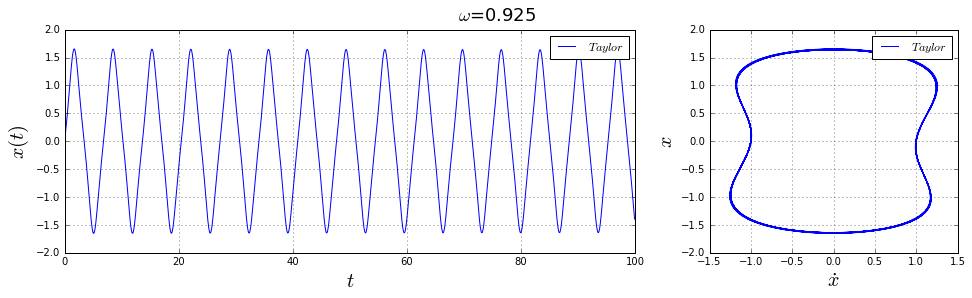

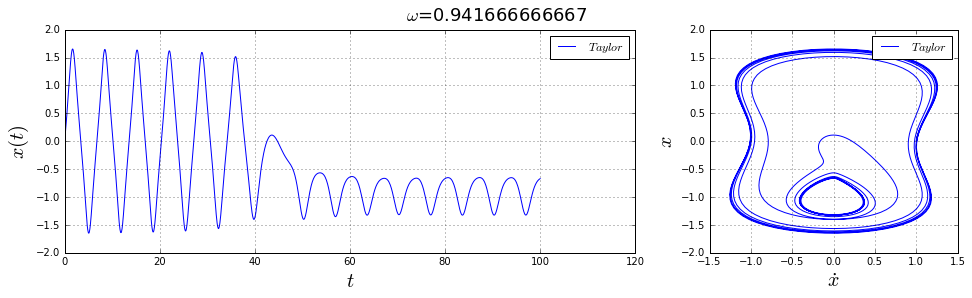

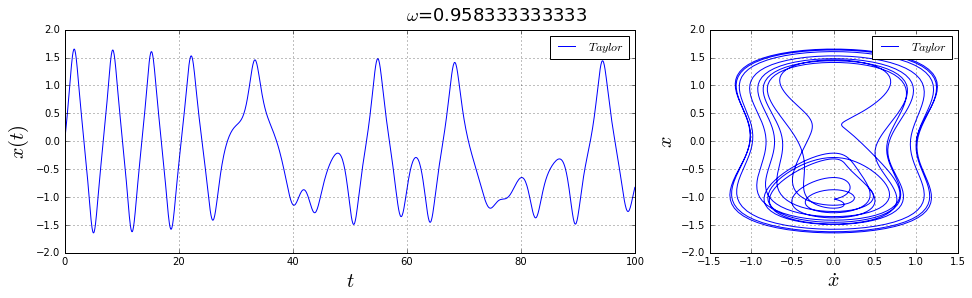

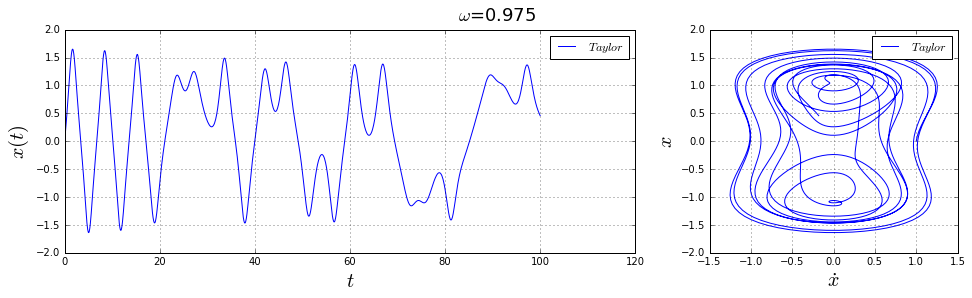

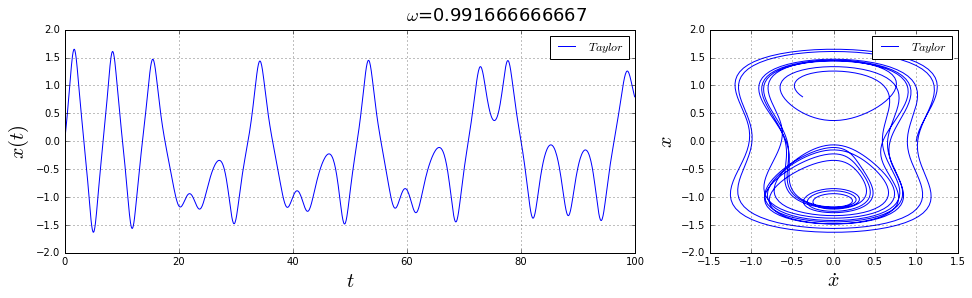

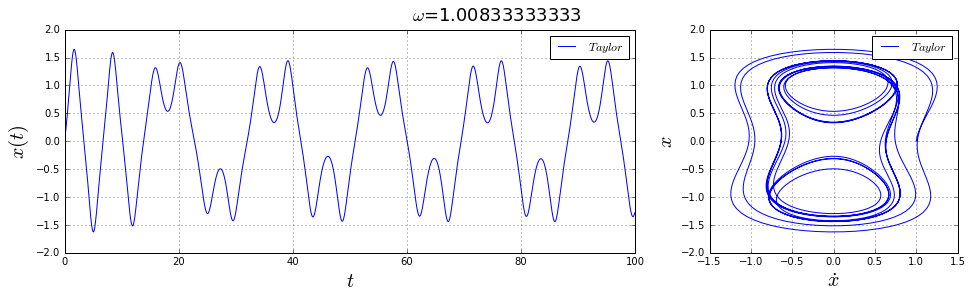

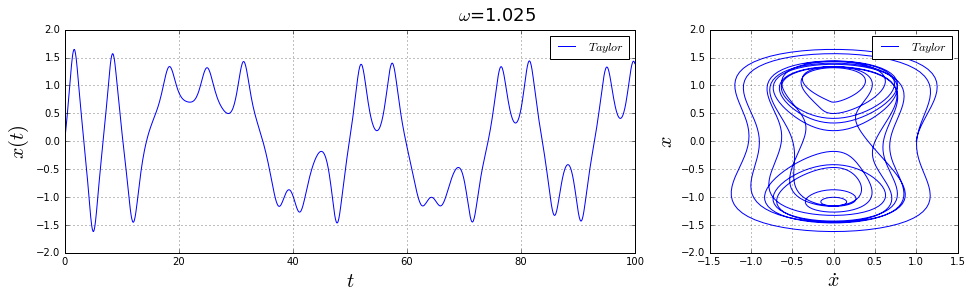

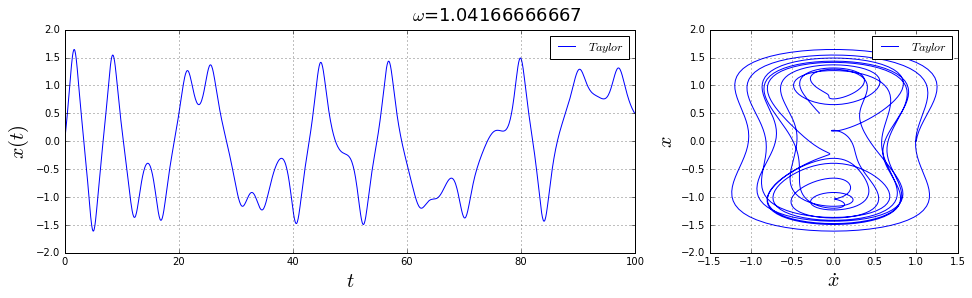

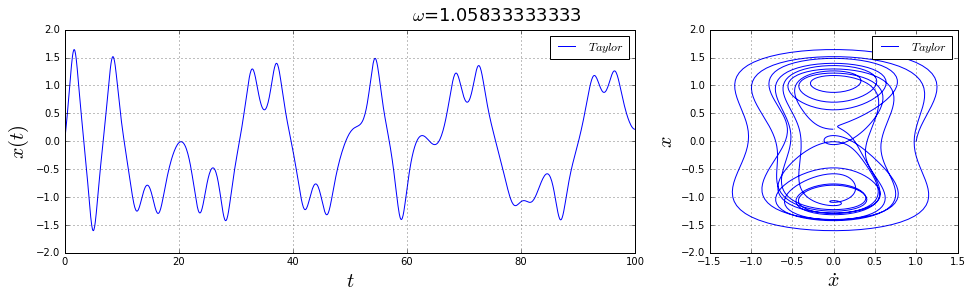

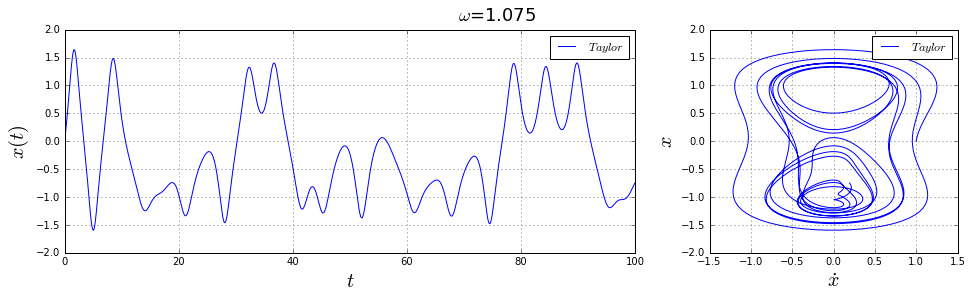

In [23]:
x0,y0 = 0.,1.
t0,tf = 0.,99.9
lista_omegas = pl.linspace(0.925,1.075,10).tolist()
for i,omega in enumerate(lista_omegas):
    t,x,y = intDuffing(x0,y0,t0,tf,funcDuffing,omega)
    
    fig=figure(figsize=(16,4))
    fig.suptitle('$\omega$={}'.format(omega),fontsize=18)
    gs=gridspec.GridSpec(1, 3,wspace=0.3)
    ax1 = subplot(gs[0, :-1])
    ax2 = subplot(gs[0, -1])
    
    ax1.plot(t,x,label="$Taylor$")
    ax1.set_ylabel('$x(t)$',fontsize=20)
    ax1.set_xlabel('$t$',fontsize=20)
    ax1.legend()
    ax1.grid()
    
    ax2.plot(y,x,label="$Taylor$")
    ax2.set_ylabel('$x$',fontsize=20)
    ax2.set_xlabel('$\dot{x}$',fontsize=20)
    ax2.legend()
    ax2.grid()
    show()